- step 1 : Model development
        input layer
        hidden layer activation function number of neurons
        dropout
        BNorm
        output layer
- step2 : Model Summary shape and parameters at each layer
- step3 : compile(optimizer , loss , metries)
- step 4 : model fit(X_train ,y_train , batch_size , epochs , validation data)


# **Imports Packages**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# **📊 Load & Visualize Fashion MNIST Data**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


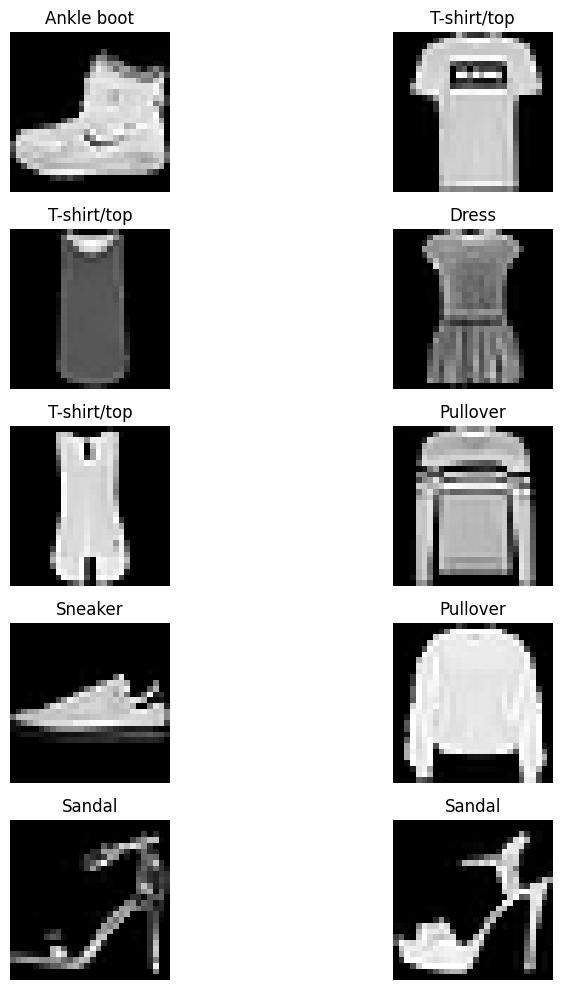

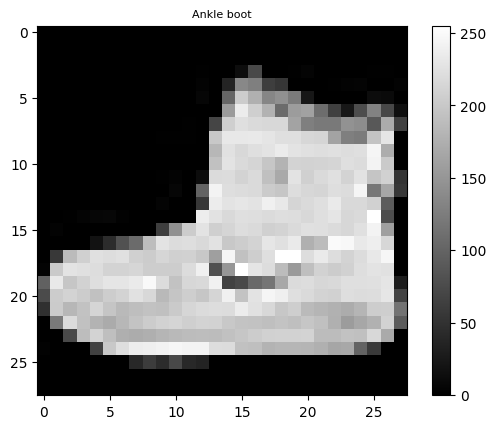

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot 10 sample images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Single image with colorbar
plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.title(class_names[y_train[0]], fontsize=8)
plt.colorbar()
plt.show()


# **⚙️Preprocessing**

In [3]:
X_train = x_train / 255.0
X_test = x_test / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

X_train, X_val, y_train_cat, y_val_cat = train_test_split(
    X_train, y_train_cat, test_size=0.2, random_state=42)


# **🏗️ Model Building & Training**

In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat,
                    batch_size=64,
                    epochs=10,
                    validation_data=(X_val, y_val_cat))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7480 - loss: 0.7227 - val_accuracy: 0.8523 - val_loss: 0.4195
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8553 - loss: 0.4028 - val_accuracy: 0.8597 - val_loss: 0.3866
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8701 - loss: 0.3521 - val_accuracy: 0.8737 - val_loss: 0.3537
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8817 - loss: 0.3208 - val_accuracy: 0.8758 - val_loss: 0.3412
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8887 - loss: 0.3005 - val_accuracy: 0.8740 - val_loss: 0.3426
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8931 - loss: 0.2915 - val_accuracy: 0.8823 - val_loss: 0.3239
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8990 - loss: 0.2675 - val_accuracy: 0.8794 - val_loss: 0.3397
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9034 - loss: 0.2545 - val_accuracy: 0.

# **📈 Training History Plot**

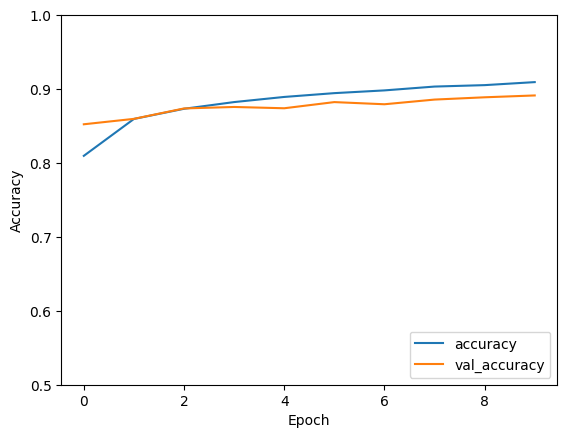

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# **📊 Evaluate Model**

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8850 - loss: 0.3304
0.8840000033378601


# **🔍 Predictions**

In [7]:
y_pred = model.predict(X_test)
np.max(y_pred[0])  # Max probability
np.argmax(y_pred[0])  # Predicted class index
class_names[np.argmax(y_pred[0])], class_names[y_test[0]]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


('Ankle boot', 'Ankle boot')

# **📷 Predictions vs Actual Visualization**


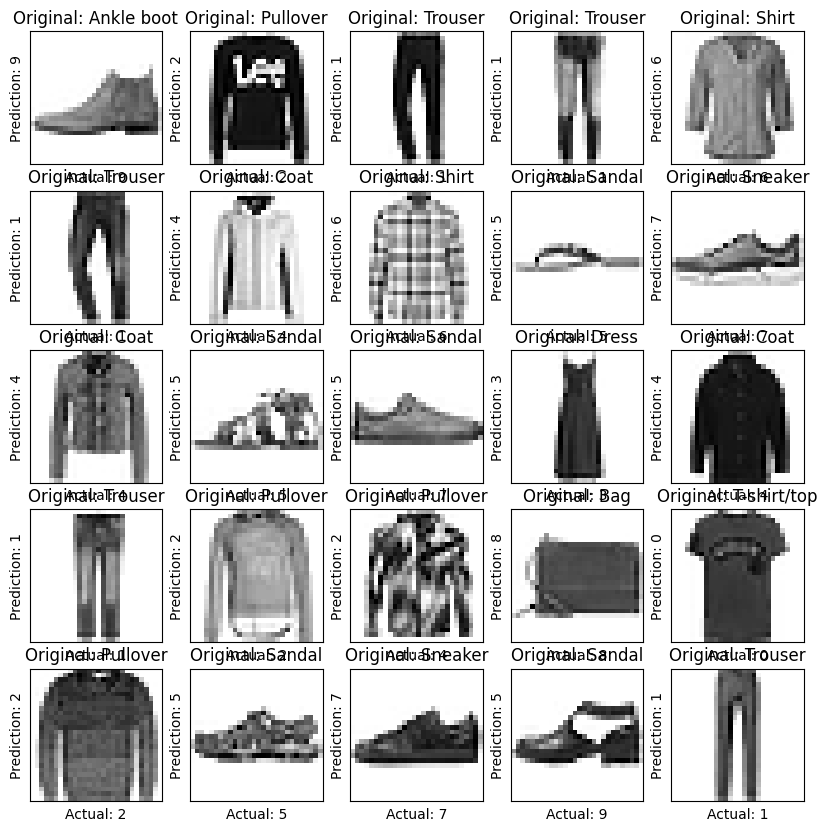

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Actual: {y_test[i]}")
    plt.ylabel(f"Prediction: {np.argmax(y_pred[i])}")
    plt.title(f"Original: {class_names[np.argmax(y_pred[i])]}")
plt.show()


# **📑 Store Prediction Results (Single)**

In [9]:
df = {
    'Max_prob': np.max(y_pred[0]),
    'Index': np.argmax(y_pred[0]),
    'Prediction_class': class_names[np.argmax(y_pred[0])],
    'Ground_truth_class': class_names[y_test[0]],
    'Output': model.predict(X_test[0].reshape(1, 28, 28))
}
d1 = pd.DataFrame([df])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


# **📑 Store Prediction Results (Multiple / Full Test Set)**

In [18]:
results = []
for i in range(1000):  # or len(X_test)
    result = {
        'Max_prob': np.max(y_pred[i]),
        'Index': np.argmax(y_pred[i]),
        'Prediction_class': class_names[np.argmax(y_pred[i])],
        'Ground_truth_class': class_names[y_test[i]],
        'Output': int(np.argmax(y_pred[i])),
        'Correct': int(np.argmax(y_pred[i]) == y_test[i])  # single digit
    }
    results.append(result)

d1 = pd.DataFrame(results)
d1




,Max_prob,Index,Prediction_class,Ground_truth_class,Output,Correct
0,0.933855,9,Ankle boot,Ankle boot,9,1
1,0.985121,2,Pullover,Pullover,2,1
2,1.000000,1,Trouser,Trouser,1,1
3,0.999999,1,Trouser,Trouser,1,1
4,0.760241,6,Shirt,Shirt,6,1
...,...,...,...,...,...,...
995,0.745039,9,Ankle boot,Ankle boot,9,1
996,0.982085,3,Dress,Dress,3,1
997,0.965140,4,Coat,Coat,4,1
998,0.999364,7,Sneaker,Sneaker,7,1
